In [1]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#import statsmodels.api as sm

In [2]:
# Importing dataset
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
# list of features/variables in boston
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [6]:
#Dataset description
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
# Converting an array of data into a pandas dataframes
df = pd.DataFrame(boston.data)

In [8]:
#to see first few observations
df.head(2)  #returns first 5 observations

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [9]:
#Adding column names in our dataframe
df.columns = boston.feature_names
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [10]:
#Adding target variable in our dataframe
df['Price'] = boston.target

In [11]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [12]:
# Shape of dataframe/ returns (no of observations x no of features)
df.shape

(506, 14)

In [13]:
#gives information about all features in our dataframe 
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [16]:
#To see statistical description of data
from pandas import set_option 
set_option('precision', 2)
df.describe(include = 'all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.59e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.65e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [17]:
#To check if our dataset contains any null/NA value
#pd.isnull(df)
df.isnull().values.any()

False

In [18]:
#If we NA values exist, then to find total count of NA values
#df.isnull().sum()
df.isnull().values.sum()

0

# Descriptive Stats

In [19]:
# correlation between variables
#set_option('precision', 2)
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.00,-0.20,0.40,-5.53e-02,0.42,-0.22,0.35,-0.38,6.22e-01,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.40,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.62,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


# Data Visualization

# Univariate

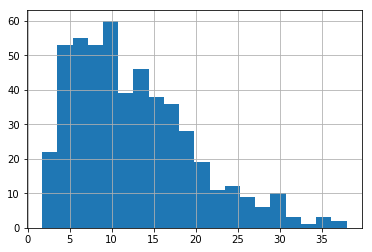

In [21]:
# To plot histogram of a particular variable
df.LSTAT.hist(bins = 20)
plt.show()
#df['LSTAT'].hist()

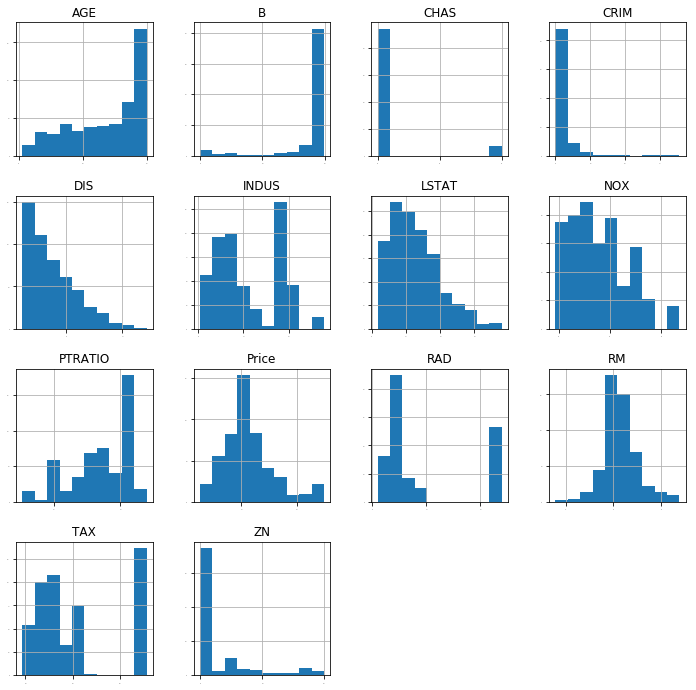

In [20]:
# to plot histograms (to check distribution of variables) of all the variables in a dataframe
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(12,12) )
plt.show()

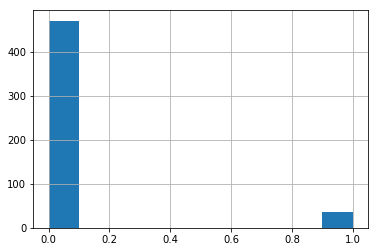

In [22]:
df.CHAS.hist()
plt.show()

In [23]:
#converting CHAS variable to categorical/qualitative type
df.CHAS =df.CHAS.astype('category')

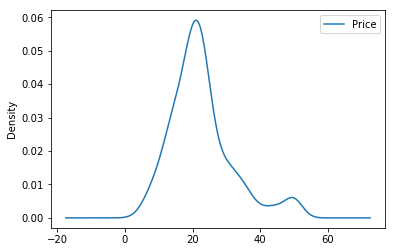

In [24]:
# density plot(to check the distribution/shape of variables)
df.Price.plot(kind='density', legend = True)
plt.show()

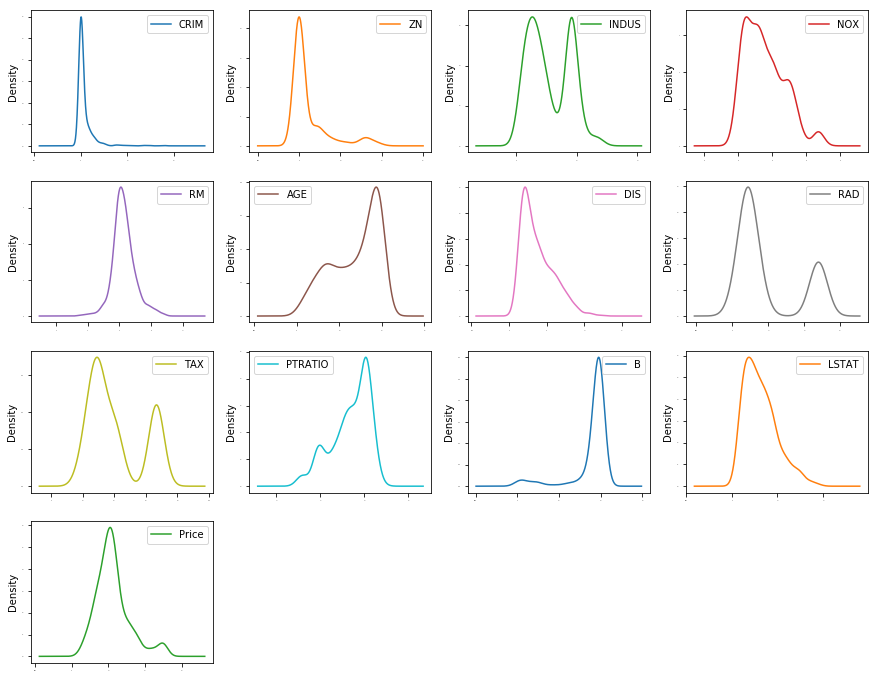

In [25]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

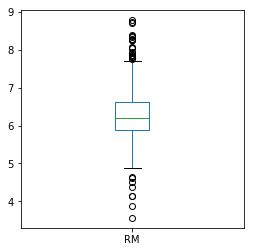

In [26]:
# box and whisker plots(To check shape of variables and outliers in variables)
df.RM.plot(kind = 'box', figsize = (4, 4))
plt.show()

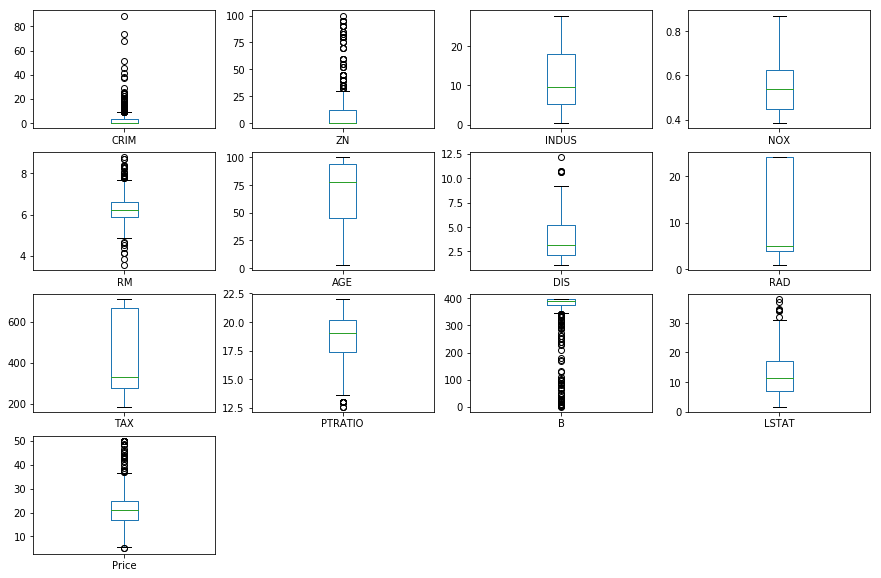

In [27]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (15, 10))
plt.show()

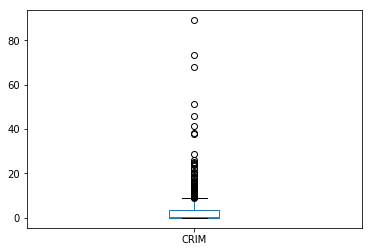

In [28]:
df.CRIM.plot(kind = 'box')

In [29]:
import seaborn as sns

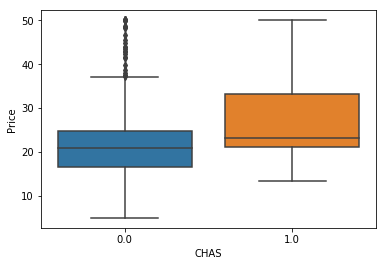

In [30]:
sns.boxplot(y = df.Price, x = df.CHAS)

# Multivariate Data Visualizations

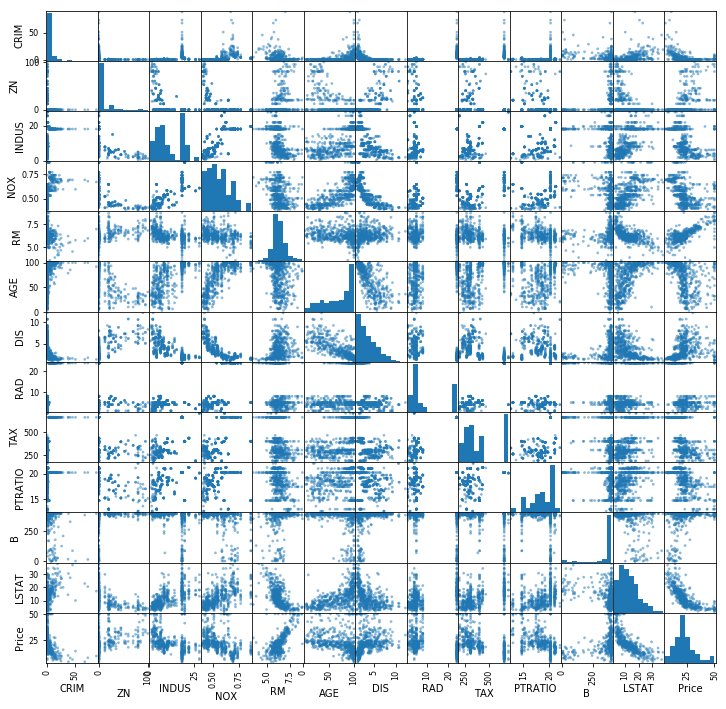

In [31]:
# scatter plot matrix (to check inter-relationship between variables)
from pandas.plotting import scatter_matrix 
scatter_matrix(df, figsize = (12,12), s = 30)
plt.show()

In [35]:
df1 = df[["LSTAT","RM", "CRIM", "Price"]]

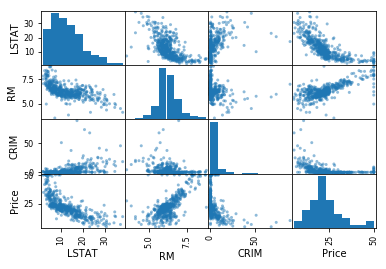

In [32]:
scatter_matrix(df[["LSTAT","RM", "CRIM", "Price"]])
#scatter_matrix(df1)
plt.show()

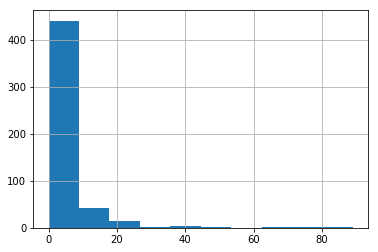

In [33]:
df.CRIM.hist()

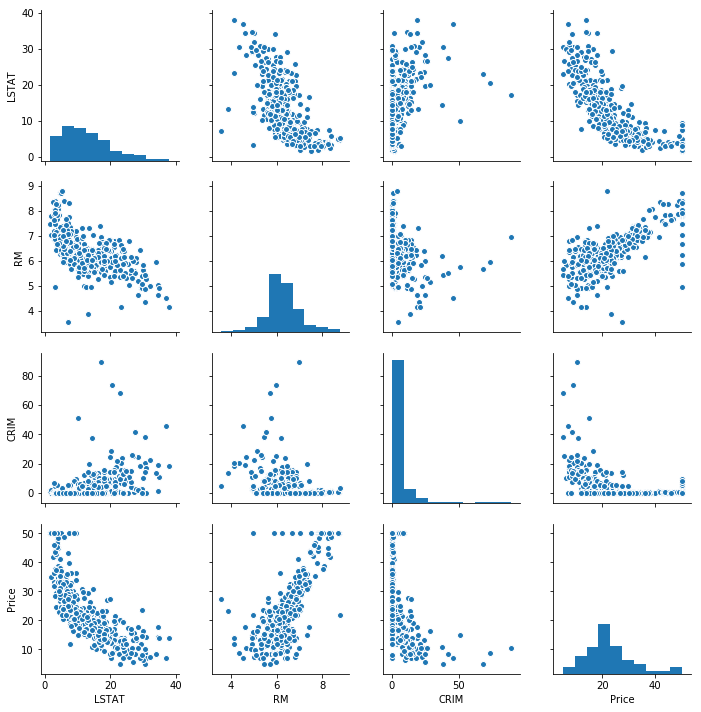

In [36]:
# Scatter plot matrix using seaborn library
#import seaborn as sns
#sns.pairplot(df)
plt.show()
sns.pairplot(df1)

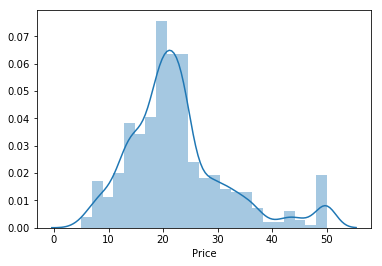

In [37]:
#import seaborn as sns
sns.distplot(df.Price)
plt.show()

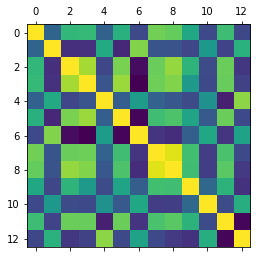

In [38]:
# correlation matrix plot
corr = df.corr()
plt.matshow(corr)
plt.show()

Above plot is not meaningful without labels. So let's re-create above plot with labels.

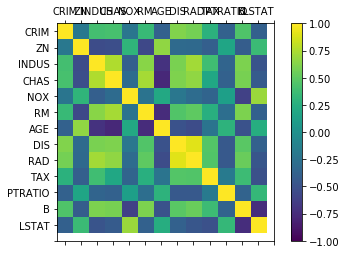

In [39]:
#correlation matrix plot with labels
#fig = plt.figure(figsize=(20,20))
fig = plt.figure()
ax = fig.add_subplot(111)  # Same as (1,1,1) (nrows, ncols, element no.)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(boston.feature_names)
ax.set_yticklabels(boston.feature_names)
#fig.savefig('fig1.png', dpi = 300)
plt.show()

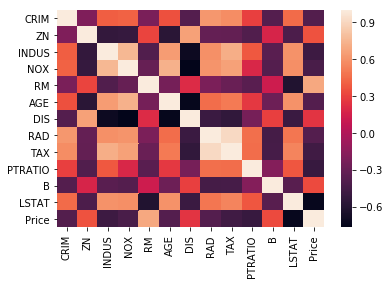

In [40]:
#Using seaborn library to create same plot
#import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

# Splitting the Dataset into Train and Test Set

In [41]:
#from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.25
trainingSet, testingSet = train_test_split(df, test_size = test_size, random_state = seed)

In [42]:
trainingSet.shape , testingSet.shape , df.shape

((379, 14), (127, 14), (506, 14))

# Model Building

In [43]:
#import statsmodels.formula.api as smf

In [44]:
#Creating a simple linear model
lm = smf.ols(formula = "Price ~ RM ", data = trainingSet)
#lm = smf.ols("Price ~ RM ", data = trainingSet)
lm_result = lm.fit()
print(lm_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     320.3
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.71e-52
Time:                        10:13:53   Log-Likelihood:                -1246.5
No. Observations:                 379   AIC:                             2497.
Df Residuals:                     377   BIC:                             2505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.8748      3.136    -10.802      0.0

In [45]:
#A model including all the independent variables

model_1 = smf.ols(formula = """Price ~ CRIM + ZN + INDUS+ CHAS
                           + NOX + RM + AGE+ +DIS   
                           +  RAD + TAX + PTRATIO 
                           + B + LSTAT""", data = trainingSet)
result_1 = model_1.fit()
print(result_1.summary())
#print(result_1.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     87.75
Date:                Tue, 16 Jul 2019   Prob (F-statistic):          1.10e-103
Time:                        10:13:54   Log-Likelihood:                -1094.5
No. Observations:                 379   AIC:                             2217.
Df Residuals:                     365   BIC:                             2272.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      33.7722      5.688      5.938      

In [46]:
# Considering model with only imp features(based on p-value)
model_2 = smf.ols('Price~CRIM + ZN + NOX + RM + +DIS + RAD + TAX + PTRATIO + B+ LSTAT' , data = trainingSet)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     114.0
Date:                Tue, 16 Jul 2019   Prob (F-statistic):          3.18e-106
Time:                        10:13:57   Log-Likelihood:                -1095.8
No. Observations:                 379   AIC:                             2214.
Df Residuals:                     368   BIC:                             2257.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.3460      5.657      5.894      0.0

In [47]:
# Creating another model based on our simple logic(considering only highly correlated predictors)
model_3 = smf.ols('Price~ LSTAT + RM + ZN' , data = trainingSet)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     230.6
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           9.37e-85
Time:                        10:13:59   Log-Likelihood:                -1165.0
No. Observations:                 379   AIC:                             2338.
Df Residuals:                     375   BIC:                             2354.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1761      3.555      0.331      0.7

In [48]:
#Calculating trainingset MSE/RMSE for model_2
y_hat2 = result_3.predict(trainingSet[['CRIM' , 'ZN' , 'NOX' , 'RM' ,'DIS' , 'PTRATIO' , 'B' ,'LSTAT']])
train_MSE = np.mean(((trainingSet.Price - y_hat2)**2))
print("Training RMSE = ", np.sqrt(train_MSE))

Training RMSE =  5.23234132063


In [49]:
#USing inbuilt function
print("MES = ", mean_squared_error(trainingSet.Price, y_hat2))
print("Training RMSE = ", np.sqrt(mean_squared_error(trainingSet.Price, y_hat2)))
print(result_2.mse_resid)  # MSE of residues
print("R_squared = ",result_2.rsquared)   # R_squared value
print("Adjusted R_squared = ",result_2.rsquared_adj)  # Adjusted R_Squared

MES =  27.3773956956
Training RMSE =  5.23234132063
19.5700181742
R_squared =  0.755988843015
Adjusted R_squared =  0.749358105054


In [50]:
#TestSet MSE
yp_test = result_3.predict(testingSet[['CRIM' , 'ZN' , 'NOX' , 'RM' ,'DIS'  , 'PTRATIO' , 'B' ,'LSTAT']])
test_MSE = np.mean(((testingSet.Price - yp_test)**2))
print("Testing RMSE is =", np.sqrt(test_MSE))

Testing RMSE is = 6.33427181342


In [51]:
#Calculating VIF scores
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Price ~ CRIM + ZN  + NOX + RM + DIS  + PTRATIO + B+ LSTAT' , data = trainingSet, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif

[1.3965895197422733,
 2.1679544719676533,
 3.1379213009532294,
 1.7559872715275773,
 3.499450558284221,
 1.4064554340589588,
 1.2896982929346634,
 2.5281186191810314]

In [52]:
# Considering model with only imp features(based on p-value)
model_3 = smf.ols('Price~CRIM + ZN + NOX + RM + +DIS + PTRATIO + B+ LSTAT' , data = trainingSet)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 16 Jul 2019   Prob (F-statistic):          3.09e-104
Time:                        10:14:06   Log-Likelihood:                -1105.6
No. Observations:                 379   AIC:                             2229.
Df Residuals:                     370   BIC:                             2265.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.9582      5.439      4.773      0.0

In [53]:
#Using user defined function to calculate VIF Score

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula='y~x', data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print(xvar_names[i], " VIF = " , vif)

In [54]:
trainingSet_num = trainingSet.drop('CHAS', axis = 1)
vif_cal(trainingSet_num, 'Price')

CRIM  VIF =  1.67
ZN  VIF =  2.33
INDUS  VIF =  3.84
NOX  VIF =  4.51
RM  VIF =  1.95
AGE  VIF =  3.35
DIS  VIF =  4.14
RAD  VIF =  7.47
TAX  VIF =  8.55
PTRATIO  VIF =  1.83
B  VIF =  1.36
LSTAT  VIF =  2.94


# Linearity & Equal variance

In [55]:
#Residual Plots
#res2 = trainingSet.Price - y_hat2
#plt.plot(  y_hat2, res2,  'b.')

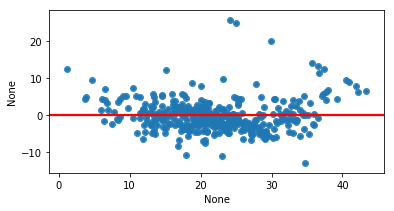

In [56]:
#Diagnosis of Model
#Checking Linearity Assusmption and Constant Variance of Residual Terms

pred_val = result_2.fittedvalues.copy()
true_val = trainingSet['Price'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,3))
_ = ax.scatter(pred_val , residual, s = 10)
sns.regplot(pred_val, residual, order = 1, ci=None, line_kws={'color':'r'})
plt.show()

# Normality

0.89140176762416867

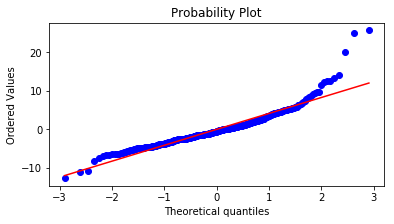

In [57]:
#Checking Normality Condition
import scipy as sp
fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

C:\Users\Vipin G Dubey\AppData\Local\conda\conda\envs\ipykernel_py3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


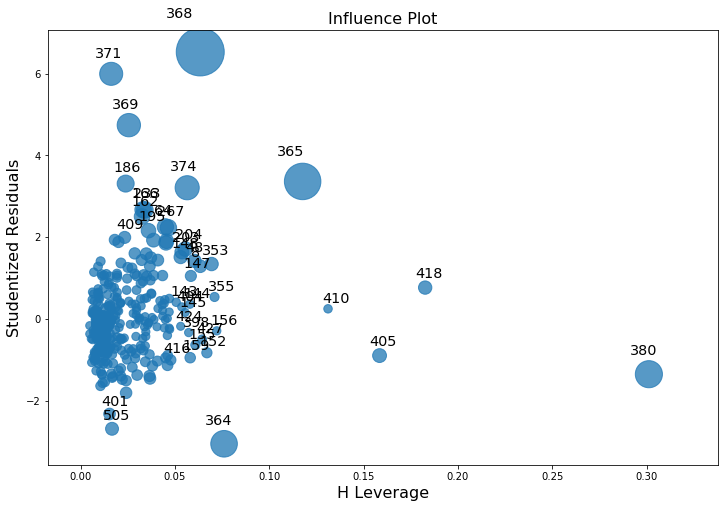

In [58]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(result_3, ax=ax, criterion="cooks")

0.89140176762416867

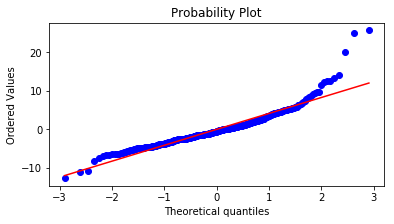

In [60]:
fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

# Using Sci-kit Learn

In [61]:
#X = trainingSet[['LSTAT', 'RM', 'NOX', 'PTRATIO']].as_matrix()
X = trainingSet[['LSTAT', 'RM', 'NOX']].as_matrix()
y = trainingSet.Price
model_4 = LinearRegression()
result = model_4.fit(X, y)
print(result.intercept_, result.coef_)
print(result.score(X, y))

2.06156674274 [-0.63546474  4.74642852 -2.76791224]
0.644820556846


In [62]:
X_new = df.drop(['Price'], axis = 1).as_matrix()
y_new = df.Price
X_new_train , X_new_test , y_new_train , y_new_test = train_test_split(X_new, y_new, test_size = 0.3 , random_state = 10)

In [63]:
X_new_train.shape , X_new_test.shape

((354, 13), (152, 13))

In [64]:
#Model training
model = LinearRegression()
result = model.fit(X_new_train, y_new_train)

In [65]:
train_MSE = np.mean((y_new_train - result.predict(X_new_train))**2)

In [66]:
test_MSE = np.mean((y_new_test - result.predict(X_new_test))**2)

In [67]:
print(np.sqrt(train_MSE))
print(np.sqrt(test_MSE))

4.41096013678
5.41830043881


In [68]:
result.score(X_new_train, y_new_train)

0.74958010150397669